<a href="https://colab.research.google.com/github/hellokena/py-02/blob/master/wk10_py_data_science_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python data science: pandas & graphics wokout

다음 차시 예고
교재 p.470

## Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [0]:
import pandas as pd # 축약
import numpy as np # 축약
import matplotlib.pyplot as plt # 측약
%matplotlib inline  

# %matplotlib inline : 노트북에 그림이 바로 출력되는 모듈
# Colab은 %matplotlib inline이 없어도 실행된다

### [1] Make data, Series, and DataFrame

### Series : Vector 구조의 Data

In [15]:
# Creating a Series by passing a list of values
s = pd.Series([1,3,5,np.nan,6,8]) # 벡터 타입의 데이터 만들어 줌 # np.nan : numpy의 not a number(결과가 없는 데이터를 처리해 줌)
s

# 1 Colum인 Vector 구조

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [16]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
dates

# 여기서 시작을 해서 6개의 연속적인 Data를 만듦
# date는 index의 역할을 함
# index를 만든 것

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
# Make dataframe using an array with random numbers
# 모든 값이 실수임
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # random : 6X4 크기의 무작위 수 생성 
                                                                           # randn : 평균 0, 표준편차 1인 수 
                                                                           # 위에서 만든 date를 index를 사용하겠다
df

,A,B,C,D
2013-01-01,-0.295161,-0.139698,0.468384,1.187353
2013-01-02,-0.281296,0.005614,0.081096,0.019074
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650
2013-01-04,1.355654,2.093856,0.382516,0.696496
2013-01-05,0.434906,0.572241,1.992356,0.622163
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533


In [18]:
# check types of df  --> same type
df.dtypes # 데이터 타입 # 64비트 실수

A    float64
B    float64
C    float64
D    float64
dtype: object

In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
# DataFrame을 만드는 방법은 여러가지, 그러나 우리는 2가지만!
df2 = pd.DataFrame({ 'A' : 1., # Broadcast 된다
                    'B' : pd.Timestamp('20130102'), # Broadcast 된다
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'), # 리스트
                    'E' : pd.Categorical(["test","train","test","train"]), # 문자열
                    'F' : 'foo' }) # 문자 # Broadcast 된다

In [20]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo




*   df와 df2의 차이점 -> Datatype이 다르다



In [21]:
# check types of df2 --> different types
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### [2] Handling data : 데이터 다루기

In [22]:
# head()
df.head() # 상위 5개의 데이터를 출력

,A,B,C,D
2013-01-01,-0.295161,-0.139698,0.468384,1.187353
2013-01-02,-0.281296,0.005614,0.081096,0.019074
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650
2013-01-04,1.355654,2.093856,0.382516,0.696496
2013-01-05,0.434906,0.572241,1.992356,0.622163


In [23]:
df.head(2) # 상위 2개의 데이터를 출력

,A,B,C,D
2013-01-01,-0.295161,-0.139698,0.468384,1.187353
2013-01-02,-0.281296,0.005614,0.081096,0.019074


In [24]:
df.tail(3) # 하위 3개의 데이터를 출력

,A,B,C,D
2013-01-04,1.355654,2.093856,0.382516,0.696496
2013-01-05,0.434906,0.572241,1.992356,0.622163
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533


In [25]:
# Display the index, columns, and the underlying NumPy data:
df.index # 현재 index는 date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [26]:
df.columns # 각 열(colum)의 제목을 보여준다

Index(['A', 'B', 'C', 'D'], dtype='object')

In [27]:
# describe() shows a quick statistic summary of your data:
df.describe() # Dataframe을 구성해주는 각 열의 데이터들의 분포를 요약해서 보여준다

# randn() 함수를 사용했기 때문에 mean은 0값에 가까움
# 그러나 우리는 적은 수(6개)의 값만을 만들었기 때문에 정확하게 0이 나오지 않고 근접한 값이 나옴

# large number 가설 : 많은 값을 모으면 평균에 근접해짐

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.015460,0.363345,0.748449,0.210150
std,0.784091,1.023911,0.927704,0.759944
min,-0.772371,-0.963663,-0.240489,-0.820650
25%,-0.474660,-0.103370,0.156451,-0.327881
50%,-0.288228,0.288927,0.425450,0.320619
75%,0.255855,0.601850,1.472218,0.677913
max,1.355654,2.093856,1.992356,1.187353


In [28]:
df2.describe() # 6개의 colum을 가짐 # 근데 왜 3개만 나올까? # 숫자형 항목이 3개밖에 없기 때문이야 # 날짜나 문자열은 describe로 표현 불가능해!

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [29]:
# Transposing your dataframe:
df.T # 전치행렬 # 행과 열을 바꿔줌

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.295161,-0.281296,-0.772371,1.355654,0.434906,-0.534492
B,-0.139698,0.005614,-0.963663,2.093856,0.572241,0.611720
C,0.468384,0.081096,1.806829,0.382516,1.992356,-0.240489
D,1.187353,0.019074,-0.820650,0.696496,0.622163,-0.443533


#### Sorting : 데이터의 정보들을 뽑아냄

In [30]:
# Sorting by an axis:
df.sort_index(axis=0, ascending=False) # axis=0 : 행기준, ascending= False : 내림차순

,A,B,C,D
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533
2013-01-05,0.434906,0.572241,1.992356,0.622163
2013-01-04,1.355654,2.093856,0.382516,0.696496
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650
2013-01-02,-0.281296,0.005614,0.081096,0.019074
2013-01-01,-0.295161,-0.139698,0.468384,1.187353


In [31]:
df.sort_index(axis=1, ascending=False) # axis=1 : 열기준

,D,C,B,A
2013-01-01,1.187353,0.468384,-0.139698,-0.295161
2013-01-02,0.019074,0.081096,0.005614,-0.281296
2013-01-03,-0.820650,1.806829,-0.963663,-0.772371
2013-01-04,0.696496,0.382516,2.093856,1.355654
2013-01-05,0.622163,1.992356,0.572241,0.434906
2013-01-06,-0.443533,-0.240489,0.611720,-0.534492


In [32]:
# Sorting by values:
df.sort_values(by='B') #, ascending=False) # B열을 기준으로 정렬

,A,B,C,D
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650
2013-01-01,-0.295161,-0.139698,0.468384,1.187353
2013-01-02,-0.281296,0.005614,0.081096,0.019074
2013-01-05,0.434906,0.572241,1.992356,0.622163
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533
2013-01-04,1.355654,2.093856,0.382516,0.696496


#### Selecting data by indexing and slicing

> **at, iat, loc, iloc**

*   loc : location
*   ioloc : index locaiton


*   Pandas에서도 indexing과 slicing 존재!

In [33]:
# Selecting a single column, which yields a Series
df['A'] # A colum의 값을 index와 함께 출력

2013-01-01   -0.295161
2013-01-02   -0.281296
2013-01-03   -0.772371
2013-01-04    1.355654
2013-01-05    0.434906
2013-01-06   -0.534492
Freq: D, Name: A, dtype: float64

In [34]:
# Selecting via [], which slices the rows.
df[0:3] # 행 index

,A,B,C,D
2013-01-01,-0.295161,-0.139698,0.468384,1.187353
2013-01-02,-0.281296,0.005614,0.081096,0.019074
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650


*   index를 가지고 접근하는 경우와 지정된 값을 접근하는 경우를 구별

     **지정된 값일 때는 마지막 값을 빼지 않는다**

In [35]:
df['20130102':'20130104'] # 인덱스가 아닌 값인 경우는 지정된 범위가 다 선택된다. # 지정된 값일 때는 마지막 값을 빼지 않는다

,A,B,C,D
2013-01-02,-0.281296,0.005614,0.081096,0.019074
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650
2013-01-04,1.355654,2.093856,0.382516,0.696496


#### Selecting data by label

In [36]:
df # 사람마다 다른 수 출력된다(교수님과 내 그래프가 다르듯이)

,A,B,C,D
2013-01-01,-0.295161,-0.139698,0.468384,1.187353
2013-01-02,-0.281296,0.005614,0.081096,0.019074
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650
2013-01-04,1.355654,2.093856,0.382516,0.696496
2013-01-05,0.434906,0.572241,1.992356,0.622163
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533


In [37]:
df.loc[dates[0]]   # loc() # 0번째 data index

A   -0.295161
B   -0.139698
C    0.468384
D    1.187353
Name: 2013-01-01 00:00:00, dtype: float64

In [38]:
# 재밌는 코드 - 이중 인덱싱
# Selecting on a multi-axis by label:
df.loc[:,['A','B']] # 행은 전부다, 열은 A,B만!

,A,B
2013-01-01,-0.295161,-0.139698
2013-01-02,-0.281296,0.005614
2013-01-03,-0.772371,-0.963663
2013-01-04,1.355654,2.093856
2013-01-05,0.434906,0.572241
2013-01-06,-0.534492,0.611720


#### [도전코딩] ★ 기말고사 출제 - 4지 선다형으로 해서 답이 아닌 것 고르기(1)

> Select data for first two days AND comumn 3,4 from df.


In [0]:
# df.loc[1:3,['C','D']] # ERROR CODE
# df.loc['20130101':'20130102',['C','D']] # OK - 1
# df.loc[dates[:2],['C','D']] # OK - 2

##### OK - 1

In [40]:
df.loc['20130101':'20130102',['C','D']]

,C,D
2013-01-01,0.468384,1.187353
2013-01-02,0.081096,0.019074


##### OK - 2

In [41]:
df.loc[dates[:2],['C','D']]

,C,D
2013-01-01,0.468384,1.187353
2013-01-02,0.081096,0.019074


#### Selecting data by position  (iloc())

In [42]:
df

,A,B,C,D
2013-01-01,-0.295161,-0.139698,0.468384,1.187353
2013-01-02,-0.281296,0.005614,0.081096,0.019074
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650
2013-01-04,1.355654,2.093856,0.382516,0.696496
2013-01-05,0.434906,0.572241,1.992356,0.622163
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533


In [43]:
df.iloc[3]  # 결과는 차원축소형으로 표현됨. # 1월 4일의 행의 data 출력
# loc은 항목의 이름 iloc은 index를 사용하는 것

A    1.355654
B    2.093856
C    0.382516
D    0.696496
Name: 2013-01-04 00:00:00, dtype: float64

#### [도전코딩] ★ 기말고사 출제 - 4지 선다형으로 해서 답이 아닌 것 고르기(2)

>Select data for first two days AND comumn 3,4 from df.

In [44]:
# iloc를 사용해서 [다시 도전]
# Select data for first two days AND comumn 3,4 from df.
df.iloc[:2,2:4]

,C,D
2013-01-01,0.468384,1.187353
2013-01-02,0.081096,0.019074


In [45]:
# Select one item
df.iloc[1,1]

0.0056140610730909665

pandas : 수학적 구조를 데이터 구조로 바꾼것

#### Selecting data by Boolean indexing

In [46]:
df

,A,B,C,D
2013-01-01,-0.295161,-0.139698,0.468384,1.187353
2013-01-02,-0.281296,0.005614,0.081096,0.019074
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650
2013-01-04,1.355654,2.093856,0.382516,0.696496
2013-01-05,0.434906,0.572241,1.992356,0.622163
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533


In [47]:
df[df.A > 0] # 0보다 큰 A의 값

,A,B,C,D
2013-01-04,1.355654,2.093856,0.382516,0.696496
2013-01-05,0.434906,0.572241,1.992356,0.622163


In [48]:
df[df > 0] # df 전체가 A보다 큰 값 # NaN: 만족하지 못하는 값이라서 이렇게 나옴 NA : Not Available

,A,B,C,D
2013-01-01,NaN,NaN,0.468384,1.187353
2013-01-02,NaN,0.005614,0.081096,0.019074
2013-01-03,NaN,NaN,1.806829,NaN
2013-01-04,1.355654,2.093856,0.382516,0.696496
2013-01-05,0.434906,0.572241,1.992356,0.622163
2013-01-06,NaN,0.611720,NaN,NaN


### Setting (데이터 재구성 또는 확장)



In [49]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [0]:
df['F'] = s1 # F라는 열 추가

In [51]:
df  # 기존 df의 구조에 맞춰서 재구성됨.

,A,B,C,D,F
2013-01-01,-0.295161,-0.139698,0.468384,1.187353,NaN
2013-01-02,-0.281296,0.005614,0.081096,0.019074,1.0
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650,2.0
2013-01-04,1.355654,2.093856,0.382516,0.696496,3.0
2013-01-05,0.434906,0.572241,1.992356,0.622163,4.0
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533,5.0


In [52]:
# Setting values by label:
df.at[dates[0],'A'] = 0 # 1월 1일 날짜와 1월1일의 열(Colum)의 제목이 A인 값을 0으로 해라
df

,A,B,C,D,F
2013-01-01,0.000000,-0.139698,0.468384,1.187353,NaN
2013-01-02,-0.281296,0.005614,0.081096,0.019074,1.0
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650,2.0
2013-01-04,1.355654,2.093856,0.382516,0.696496,3.0
2013-01-05,0.434906,0.572241,1.992356,0.622163,4.0
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533,5.0


In [53]:
# Setting values by position (index):
df.iat[0,1] = 0 # 1월 1일 B Colum의 값을 0으로 해라
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.468384,1.187353,NaN
2013-01-02,-0.281296,0.005614,0.081096,0.019074,1.0
2013-01-03,-0.772371,-0.963663,1.806829,-0.820650,2.0
2013-01-04,1.355654,2.093856,0.382516,0.696496,3.0
2013-01-05,0.434906,0.572241,1.992356,0.622163,4.0
2013-01-06,-0.534492,0.611720,-0.240489,-0.443533,5.0


In [54]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df)) # 행은 전체, 열은 D열만 값이 5인 리스트를 데이터 프레임의 길이(6)만큼 => 5를 6개 추가해라
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.468384,5,NaN
2013-01-02,-0.281296,0.005614,0.081096,5,1.0
2013-01-03,-0.772371,-0.963663,1.806829,5,2.0
2013-01-04,1.355654,2.093856,0.382516,5,3.0
2013-01-05,0.434906,0.572241,1.992356,5,4.0
2013-01-06,-0.534492,0.611720,-0.240489,5,5.0


### Missing data

- pandas primarily uses the value np.nan to represent missing data. 

- 우선적으로 MISSING 데이터의 값을 표현하기 위해서 NAN을 사용한다

In [55]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E']) # 인덱스를 변경 0 1 2 3 (1월 1일~ 1월 4일) # colum은 다 하고 E colum 추가 # 근데 E값에 값을 할당안해서 NaN로 나와
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.468384,5,NaN,NaN
2013-01-02,-0.281296,0.005614,0.081096,5,1.0,NaN
2013-01-03,-0.772371,-0.963663,1.806829,5,2.0,NaN
2013-01-04,1.355654,2.093856,0.382516,5,3.0,NaN


In [56]:
df1.loc[dates[0]:dates[1],'E'] = 1 #  첫쨋날과 둘쨋날의 E열은 1로 해라
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.468384,5,NaN,1.0
2013-01-02,-0.281296,0.005614,0.081096,5,1.0,1.0
2013-01-03,-0.772371,-0.963663,1.806829,5,2.0,NaN
2013-01-04,1.355654,2.093856,0.382516,5,3.0,NaN


In [57]:
# To drop any rows that have missing data.
df1.dropna(how='any') #  숫자가 아닌 것은 다 DROP해라 # 2일 데이터만 살아남음

,A,B,C,D,F,E
2013-01-02,-0.281296,0.005614,0.081096,5,1.0,1.0


In [58]:
# Filling missing data.
df1.fillna(value=5) # NA가 다 5로 채워짐

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.468384,5,5.0,1.0
2013-01-02,-0.281296,0.005614,0.081096,5,1.0,1.0
2013-01-03,-0.772371,-0.963663,1.806829,5,2.0,5.0
2013-01-04,1.355654,2.093856,0.382516,5,3.0,5.0


In [59]:
# Get the boolean mask where values are nan.
pd.isna(df1) # ISNA : NA가 있는 곳만 TRUE

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats

In [60]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.468384,5,NaN
2013-01-02,-0.281296,0.005614,0.081096,5,1.0
2013-01-03,-0.772371,-0.963663,1.806829,5,2.0
2013-01-04,1.355654,2.093856,0.382516,5,3.0
2013-01-05,0.434906,0.572241,1.992356,5,4.0
2013-01-06,-0.534492,0.611720,-0.240489,5,5.0


In [61]:
df.mean() # A열에 대한 각 mean... # F열에서는 NaN 빼고 계산

A    0.033733
B    0.386628
C    0.748449
D    5.000000
F    3.000000
dtype: float64

In [62]:
df.mean(0) # 각 열에 맞춰 아래로 쭉 한 열씩 평균 내는 것

A    0.033733
B    0.386628
C    0.748449
D    5.000000
F    3.000000
dtype: float64

In [63]:
df.mean(1) # 각 행에 맞춰 옆으로 쭉 한 행씩 평균 내는 것

2013-01-01    1.367096
2013-01-02    1.161083
2013-01-03    1.414159
2013-01-04    2.366405
2013-01-05    2.399901
2013-01-06    1.967348
Freq: D, dtype: float64

***

# Chapter 12-03
## matplotlib을 사용한다

### plot( )로 그래프를 그린다

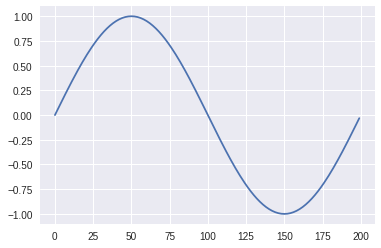

In [64]:
# sin그래프를 그린다
%matplotlib inline 
# 그래프가 notebook자체에 바로 그려짐
import numpy as np
import matplotlib.pyplot as plt

s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01)) # 0.0부터 2.0까지 0.01만큼 증가
t = plt.plot(s)    # sin의 그래프를 그림

# x축이 data index
# 아래 그래프 그려봐

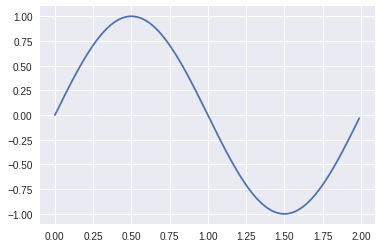

In [65]:
plt.plot(np.arange(0.0, 2.0, 0.01),s) # x축에서 index 값이 아닌 실제값이 값이 되도록 하는 그래프

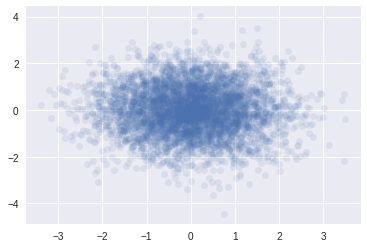

In [66]:
# 산포도(scatter plot)를 그린다
# 인수 마커를 사용하여 산포도를 작성
x = np.random.randn(5000)    # 표준 정규 분포에 따라 난수 생성 # 무작위수
y = np.random.randn(5000)    # 무작위수
t = plt.plot(x, y, 'o', alpha=0.1) # x와 y를 pair로 해서 표현

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


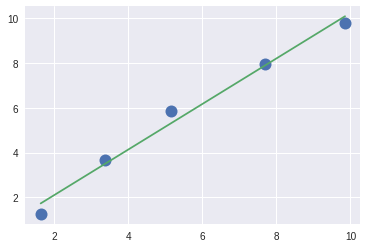

In [67]:
# linear regression 선형 회귀 그래프
# 그래프를 중복해 그림
x = np.array([1.628, 3.363, 5.145, 7.683, 9.855])
y = np.array([1.257, 3.672, 5.841, 7.951, 9.775]) # x축 값 5개, y축 값 5개
# 최소 자승법(least square method)으로 데이터를 근사하는 직선을 구함
a = np.array([x, np.ones(x.size)]) # numpy에서 현재 x와 x값 list 크기 만큼(5개) 모든 원소가 1인 list를 추가로 해서 리스트를 2차원으로 확장
a = a.T # 전치행렬
m, c = np.linalg.lstsq(a, y)[0] # 두 함수 호출 a값과 y를 상수항이 들어가 있는 ??? 기울기 구함
t = plt.plot(x, y, 'o', ms=12)   # 데이터를 그림
t = plt.plot(x, (m*x+c))  # 근사직선을 그림, m:기울기,c:bias(절편)

# 다음주 다음주

#### Understand Graph

* 점 : 원래 데이터 값
* 선 : 최소자승법으로 추정한 최귀식의 적합선

####np.linalg.lstsq : 최소자승 해 풀기

*   linalg : numpy의 서브 패키지 이름
*   lstsq : 두 행렬을 인수로 받아 최소자승문제의 답, 잔차제곱합 랭크 , 특이값 등을 인수를 반환


In [68]:
m,c

(1.0169805709922228, 0.0704159356722421)

### plot( )로 그림을 제어

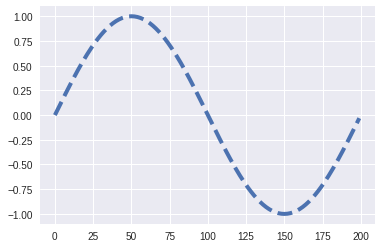

In [69]:
# 선 스타일 변경
s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s, linestyle='--', linewidth=4)

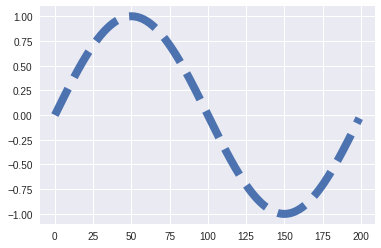

In [70]:
# 선 스타일 변경
s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s, linestyle='--', linewidth=8) # linewidth를 8로 변경함

### 문자를 삽입한다 - 그냥 넘어가기

In [0]:
# 표시용 폰트 지정
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'AppleGothic'

In [0]:
# 시스템에서 사용 가능한 글꼴 목록을 표시
import matplotlib.font_manager as fm
fontsfamily = fm.findSystemFonts()

In [73]:
fontsfamily[:5]

['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf']

***

# Chapter 12-04
## 일본 인구를 시각화한다

### 인구 데이터를 읽어 들임

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) # 3개 동시에 선택하기

Saving female_1944_2014.csv to female_1944_2014.csv
Saving male_1944_2014.csv to male_1944_2014.csv
Saving total_fertility_rate.csv to total_fertility_rate.csv
User uploaded file "female_1944_2014.csv" with length 7323 bytes
User uploaded file "male_1944_2014.csv" with length 7218 bytes
User uploaded file "total_fertility_rate.csv" with length 550 bytes


In [0]:
# 1944년부터 2014년까지의 5계층 단계별로 인구를 남녀별로 읽어 들임
import numpy as np

p_male = np.loadtxt('male_1944_2014.csv', delimiter=",", # delimiter="," : 구분자
                      skiprows=1, usecols=range(1, 22)) # 첫번째 행은 그 연도 인구 1살부터 4살, 5살부터 8살... 인구 분포 텍스트 빼고 추출하겠다! 
                                                        # 첫번째 열(0번째 colum)은 연도기 때문에 빼고 나머지 사용
p_female = np.loadtxt('female_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))

In [5]:
# 계급별과 연도별로 인구를 계산한다.
# 남녀 5세씩의 단계별로 인구를 합계
p_total = p_male+p_female
print(p_total)
# 연도별 인구로 수정
p_yearly = p_total.sum(axis=1) # 현재 남자와 여자의 data가 따로따로 정해져 있는데, 둘을 해당 연도별로 합해주는 것
p_yearly

[[8712. 8803. 8684. ...    0.    0.    0.]
 [9251. 8581. 8645. ...    0.    0.    0.]
 [7858. 8734. 8692. ...    0.    0.    0.]
 ...
 [5272. 5407. 5868. ... 1146.  331.   51.]
 [5239. 5361. 5790. ... 1215.  343.   55.]
 [5213. 5307. 5713. ... 1305.  352.   60.]]


array([ 73063.,  71999.,  73115.,  78101.,  80003.,  81771.,  83199.,
        84571.,  85854.,  87034.,  88294.,  89277.,  90258.,  91086.,
        92010.,  92971.,  93420.,  94285.,  95179.,  96157.,  97187.,
        98275.,  99054., 100244., 101410., 102649., 103719., 105013.,
       107334., 108709., 110050., 111940., 113086., 114153., 115174.,
       116131., 117061., 117879., 118693., 119485., 120237., 121046.,
       121672., 122264., 122784., 123254., 123611., 124044., 124452.,
       124765., 125033., 125568., 125865., 126169., 126485., 126685.,
       126923., 127289., 127433., 127618., 127687., 127766., 127769.,
       127767., 127690., 127509., 128057., 127799., 127513., 127295.,
       127082.])

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


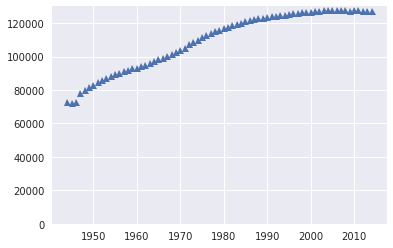

In [104]:
# 연도별 인구를 그래프화 한다
%matplotlib inline
import matplotlib.pyplot as plt

t = plt.plot(range(1944, 2015), p_yearly, '^') # 날짜 2014년까지 천단위로 인구 표시(세로축)
plt.ylim((0, 130000)) # y축의 범위
plt.grid(True) # 격자

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


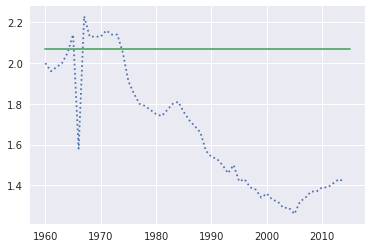

In [105]:
# 출생률(합계 특수 출생률) 그래프를 그린다
# 1960년에서 2014년을 읽어 들임
tfr = np.loadtxt('total_fertility_rate.csv', delimiter=",", skiprows=1) # 콤마(,)로 구분, 맨위(1열, 인덱스로는 0번째 열) 데이터 뺴고 읽어들임
# 출산율 그래프를 그린다
t = plt.plot(range(1960, 2015), tfr, ls=":") # 날짜 2014년까지
# 인구 치환 경계선을 2.07로 하여 선을 그림
t = plt.plot([1960, 2015], [2.07, 2.07]) # 이 라인보다 낮으면 출생률이 낮아진다는 것을 확인하기 위한 그래프(초록선)

### 인구 피라미드를 그린다

In [0]:
# show_pgraph( ) 함수의 정의
from matplotlib import gridspec

def show_pgraph(year, arr1, arr2, arr3,
                ymin, ymax, ydim=1): # 시작 연도, 마지막 연도, 연도 간격
#     fig = plt.figure(figsize=(10,9))
    # 인구 피라미드를 표시
    # 표시하는 인구의 인덱스를 가져옴 (1년 간격)
    idx = int((year-ymin)/ydim)
    # 인구 피라미드와 인구 그래프의 그리드를 생성
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 2)) # 2X2 그래프 그리겠다(??) - 배치
    # 그래프의 배치를 결정
    ax = [plt.subplot(gs[0, 0]),plt.subplot(gs[0, 1]),
          plt.subplot(gs[1, :])] # 고급 그래픽 파이썬 함수 - 그냥 넘어가자 설명만 들어
    # 남성 인구 피라미드를 그림
    ax[0].barh(range(0, 101, 5), arr1[idx], height=3) # bar graph 0부터 100세까지 5살 단위로 그림 # 그래프의 높이는 3으로 해가지고 
    ax[0].set(ylim=(0, 100), xlim=(0, 6000))
    ax[0].invert_xaxis() # 첫번째 축을 반전을 시킴 # 여기서 시작이 아니라........여기서시작
    ax[0].yaxis.tick_right() # y축의 눈금은 오른쪽에 그려지도록
    # 여성 인구 피라미드를 그림
    ax[1].barh(range(0, 101, 5), arr2[idx], height=4)
    ax[1].tick_params(labelleft='off') # 남자랑 공유하기 때문에 off
    ax[1].set(ylim=(0, 100), xlim=(0, 6000)) # 여자는 invert 안함 # 남자 : ax[0].invert_xaxis()
    # 인구 그래프를 그림
    ax[2].plot(range(ymin, ymax+1, ydim), arr3, ls=":")
    ax[2].plot([year, year], [0, 140000])

#### Understand Code

##### ax[0].invert_xaxis()

*   왼쪽에 배치된 남자 그래프의 시작을 일반적인 오른쪽에서 시작하는 것이 아니라 왼쪽에서 시작하도록 한다.





/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


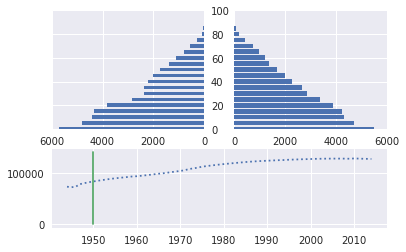

In [107]:
# 인구 피라미드의 그래프를 그린다
show_pgraph(1950, p_male, p_female, p_yearly,
            1944, 2014) # 1950년도의 남자인구 , 여자인구 그래프

> year를 변경해서 그래프를 그려보시오.

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


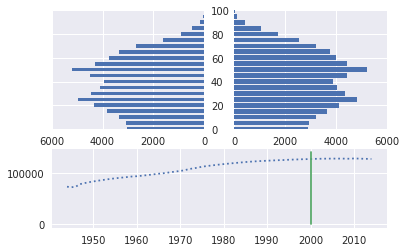

In [110]:
# 인구 피라미드의 그래프를 그린다
show_pgraph(2000, p_male, p_female, p_yearly, # 2000년도
            1944, 2014)

***

## 특강안내

### VR 응용과 전망 (HC 관련 내용 포함)

### 11월8일(목) 4시~6시, 신어관 101호 강당

***

### [wk10] homework

#### 다음 파이썬 노트북 [tips_reshape](https://github.com/Redwoods/Py/blob/master/py-basic/tips/Tips_py_reshape.ipynb) 을 colab에서 실행하고 설명을 추가해서 github에 올리시오.(마감: 2018.11.11(일). 24:00)

> 제출 파일명: Summary_reshape.ipynb

***